In [1]:
!pip install pandas matplotlib scikit-learn statsmodels tensorflow

In [3]:
print(data.head())

   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

        25  
0  23.4190  
1  23.4236  
2  23.3442  
3  23.3739  
4  23.4044  

[5 rows

In [4]:
import pandas as pd

# Load dataset
data = pd.read_csv('train_FD001.txt', sep=" ", header=None)
print(data.shape)  # This will show the number of rows and columns

(20631, 28)


In [5]:
# Drop unnecessary columns
data = data.dropna(axis=1)  # Drop empty columns automatically
print(data.shape)  # Check the updated column count

(20631, 26)


In [6]:
data.columns = [
    "engine_id", "cycle", "operating_condition1", "operating_condition2",
    "operating_condition3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5",
    "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11",
    "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17",
    "sensor18", "sensor19", "sensor20", "sensor21"
]
print(data.head())

   engine_id  cycle  operating_condition1  operating_condition2  \
0          1      1               -0.0007               -0.0004   
1          1      2                0.0019               -0.0003   
2          1      3               -0.0043                0.0003   
3          1      4                0.0007                0.0000   
4          1      5               -0.0019               -0.0002   

   operating_condition3  sensor1  sensor2  sensor3  sensor4  sensor5  ...  \
0                 100.0   518.67   641.82  1589.70  1400.60    14.62  ...   
1                 100.0   518.67   642.15  1591.82  1403.14    14.62  ...   
2                 100.0   518.67   642.35  1587.99  1404.20    14.62  ...   
3                 100.0   518.67   642.35  1582.79  1401.87    14.62  ...   
4                 100.0   518.67   642.37  1582.85  1406.22    14.62  ...   

   sensor12  sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  \
0    521.66   2388.02   8138.62    8.4195      0.03       3

In [7]:
import pandas as pd

# Load dataset
data = pd.read_csv('train_FD001.txt', sep=" ", header=None)
data = data.dropna(axis=1)  # Drop extra empty columns

# Assign correct column names
data.columns = [
    "engine_id", "cycle", "operating_condition1", "operating_condition2",
    "operating_condition3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5",
    "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11",
    "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17",
    "sensor18", "sensor19", "sensor20", "sensor21"
]

print(data.head())  # Display the first few rows

   engine_id  cycle  operating_condition1  operating_condition2  \
0          1      1               -0.0007               -0.0004   
1          1      2                0.0019               -0.0003   
2          1      3               -0.0043                0.0003   
3          1      4                0.0007                0.0000   
4          1      5               -0.0019               -0.0002   

   operating_condition3  sensor1  sensor2  sensor3  sensor4  sensor5  ...  \
0                 100.0   518.67   641.82  1589.70  1400.60    14.62  ...   
1                 100.0   518.67   642.15  1591.82  1403.14    14.62  ...   
2                 100.0   518.67   642.35  1587.99  1404.20    14.62  ...   
3                 100.0   518.67   642.35  1582.79  1401.87    14.62  ...   
4                 100.0   518.67   642.37  1582.85  1406.22    14.62  ...   

   sensor12  sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  \
0    521.66   2388.02   8138.62    8.4195      0.03       3

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Identify sensor columns (from 'sensor1' to 'sensor21')
sensor_columns = [
    "sensor1", "sensor2", "sensor3", "sensor4", "sensor5",
    "sensor6", "sensor7", "sensor8", "sensor9", "sensor10",
    "sensor11", "sensor12", "sensor13", "sensor14", "sensor15",
    "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"
]

# Apply MinMaxScaler
scaler = MinMaxScaler()
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])

print("Normalized sensor data:")
print(data[sensor_columns].head())

Normalized sensor data:
   sensor1   sensor2   sensor3   sensor4  sensor5  sensor6   sensor7  \
0      0.0  0.183735  0.406802  0.309757      0.0      1.0  0.726248   
1      0.0  0.283133  0.453019  0.352633      0.0      1.0  0.628019   
2      0.0  0.343373  0.369523  0.370527      0.0      1.0  0.710145   
3      0.0  0.343373  0.256159  0.331195      0.0      1.0  0.740741   
4      0.0  0.349398  0.257467  0.404625      0.0      1.0  0.668277   

    sensor8   sensor9  sensor10  ...  sensor12  sensor13  sensor14  sensor15  \
0  0.242424  0.109755       0.0  ...  0.633262  0.205882  0.199608  0.363986   
1  0.212121  0.100242       0.0  ...  0.765458  0.279412  0.162813  0.411312   
2  0.272727  0.140043       0.0  ...  0.795309  0.220588  0.171793  0.357445   
3  0.318182  0.124518       0.0  ...  0.889126  0.294118  0.174889  0.166603   
4  0.242424  0.149960       0.0  ...  0.746269  0.235294  0.174734  0.402078   

   sensor16  sensor17  sensor18  sensor19  sensor20  sensor21 

In [10]:
# Compute time to failure for each engine
data['time_to_failure'] = data.groupby('engine_id')['cycle'].transform("max") - data['cycle']

print("Dataset with 'time_to_failure':")
print(data[['engine_id', 'cycle', 'time_to_failure']].head())

Dataset with 'time_to_failure':
   engine_id  cycle  time_to_failure
0          1      1              191
1          1      2              190
2          1      3              189
3          1      4              188
4          1      5              187


In [11]:
print("Preprocessed data overview:")
print(data.head())

Preprocessed data overview:
   engine_id  cycle  operating_condition1  operating_condition2  \
0          1      1               -0.0007               -0.0004   
1          1      2                0.0019               -0.0003   
2          1      3               -0.0043                0.0003   
3          1      4                0.0007                0.0000   
4          1      5               -0.0019               -0.0002   

   operating_condition3  sensor1   sensor2   sensor3   sensor4  sensor5  ...  \
0                 100.0      0.0  0.183735  0.406802  0.309757      0.0  ...   
1                 100.0      0.0  0.283133  0.453019  0.352633      0.0  ...   
2                 100.0      0.0  0.343373  0.369523  0.370527      0.0  ...   
3                 100.0      0.0  0.343373  0.256159  0.331195      0.0  ...   
4                 100.0      0.0  0.349398  0.257467  0.404625      0.0  ...   

   sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  sensor19  \
0  0.205882  

In [12]:
from sklearn.model_selection import train_test_split

# Define features and target
sensor_columns = [
    "sensor1", "sensor2", "sensor3", "sensor4", "sensor5",
    "sensor6", "sensor7", "sensor8", "sensor9", "sensor10",
    "sensor11", "sensor12", "sensor13", "sensor14", "sensor15",
    "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"
]
X = data[sensor_columns]  # Features: sensor data
y = data["time_to_failure"]  # Target: time to failure

print("Features and target defined successfully!")

Features and target defined successfully!


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (16504, 21)
Testing data shape: (4127, 21)


In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16504, 21)
y_train shape: (16504,)
X_test shape: (4127, 21)
y_test shape: (4127,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [17]:
# Predict on the testing set
predictions = model.predict(X_test)

print("Predictions made successfully!")

Predictions made successfully!


In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 1964.507779766966
Mean Absolute Error (MAE): 34.03536855760963


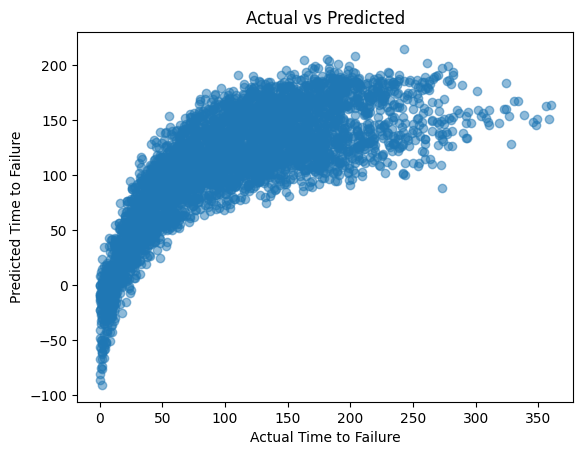

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Time to Failure")
plt.ylabel("Predicted Time to Failure")
plt.title("Actual vs Predicted")
plt.show()

Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model training complete!")

Random Forest model training complete!


In [21]:
# Predict on the test set
rf_predictions = rf_model.predict(X_test)

print("Random Forest predictions complete!")

Random Forest predictions complete!


In [22]:
# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest MAE: {rf_mae}")

Random Forest MSE: 1714.6955796704628
Random Forest MAE: 29.572015992246186


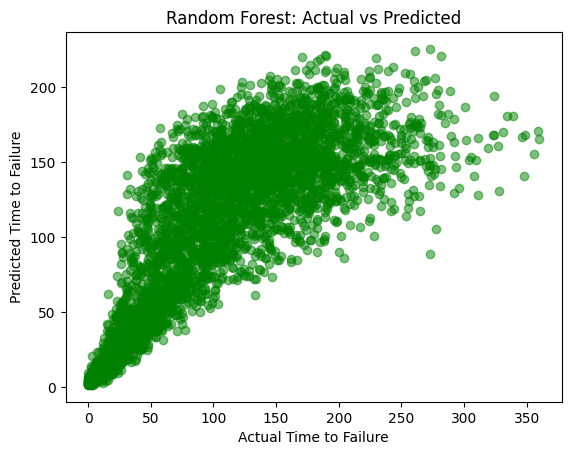

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_predictions, alpha=0.5, color='green')
plt.xlabel("Actual Time to Failure")
plt.ylabel("Predicted Time to Failure")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

In [24]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, "random_forest_model.pkl")
print("Random Forest model saved successfully!")

Random Forest model saved successfully!


**Analyze Feature Importance**
	•	Check which sensors contribute most to the predictions:

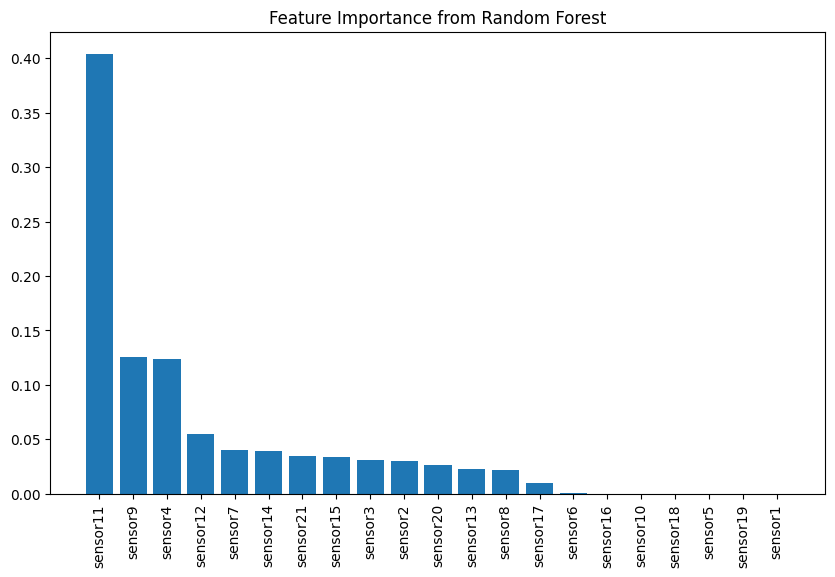

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [sensor_columns[i] for i in indices], rotation=90)
plt.title("Feature Importance from Random Forest")
plt.show()

**Accuracy**

In [26]:
# Check the range of the target variable
print("Min time_to_failure:", y.min())
print("Max time_to_failure:", y.max())

Min time_to_failure: 0
Max time_to_failure: 361


In [29]:
# Calculate MAPE
mape = (abs(y_test - rf_predictions) / y_test).mean() * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Percentage Error (MAPE): inf%


In [30]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, rf_predictions)
print(f"R² Score: {r2}")

R² Score: 0.6246941408226915


name error

In [6]:
import pandas as pd

# Reload the dataset
data = pd.read_csv('train_FD001.txt', sep=" ", header=None)
data = data.dropna(axis=1)  # Drop extra empty columns

# Define column names
data.columns = [
    "engine_id", "cycle", "operating_condition1", "operating_condition2",
    "operating_condition3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5",
    "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11",
    "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17",
    "sensor18", "sensor19", "sensor20", "sensor21"
]

# Add target column (time_to_failure)
data['time_to_failure'] = data.groupby('engine_id')['cycle'].transform("max") - data['cycle']

print(data.head())  # Display the first few rows

   engine_id  cycle  operating_condition1  operating_condition2  \
0          1      1               -0.0007               -0.0004   
1          1      2                0.0019               -0.0003   
2          1      3               -0.0043                0.0003   
3          1      4                0.0007                0.0000   
4          1      5               -0.0019               -0.0002   

   operating_condition3  sensor1  sensor2  sensor3  sensor4  sensor5  ...  \
0                 100.0   518.67   641.82  1589.70  1400.60    14.62  ...   
1                 100.0   518.67   642.15  1591.82  1403.14    14.62  ...   
2                 100.0   518.67   642.35  1587.99  1404.20    14.62  ...   
3                 100.0   518.67   642.35  1582.79  1401.87    14.62  ...   
4                 100.0   518.67   642.37  1582.85  1406.22    14.62  ...   

   sensor13  sensor14  sensor15  sensor16  sensor17  sensor18  sensor19  \
0   2388.02   8138.62    8.4195      0.03       392      23

In [7]:
print(data.shape)  # Check the number of rows and columns
print(data.columns)  # Verify column names

(20631, 27)
Index(['engine_id', 'cycle', 'operating_condition1', 'operating_condition2',
       'operating_condition3', 'sensor1', 'sensor2', 'sensor3', 'sensor4',
       'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16',
       'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21',
       'time_to_failure'],
      dtype='object')


In [8]:
from sklearn.model_selection import train_test_split

# Define features and target
sensor_columns = [
    "sensor1", "sensor2", "sensor3", "sensor4", "sensor5",
    "sensor6", "sensor7", "sensor8", "sensor9", "sensor10",
    "sensor11", "sensor12", "sensor13", "sensor14", "sensor15",
    "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"
]
X = data[sensor_columns]  # Features
y = data["time_to_failure"]  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully!")

Data split successfully!


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
print("Model training and predictions complete!")

Model training and predictions complete!


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_predictions)
mape = (np.abs(y_test - rf_predictions) / y_test).mean() * 100

# Display metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 29.56427913738793
Mean Squared Error (MSE): 1712.8804476375092
Root Mean Squared Error (RMSE): 41.38695987430714
R² Score: 0.6250914298197734
Mean Absolute Percentage Error (MAPE): inf%


In [15]:
# Exclude zero values in y_test for MAPE calculation
non_zero_indices = y_test != 0
mape = (np.abs(y_test[non_zero_indices] - rf_predictions[non_zero_indices]) / y_test[non_zero_indices]).mean() * 100

print(f"Corrected Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Corrected Mean Absolute Percentage Error (MAPE): 35.83%


In [16]:
# Define the threshold for classification
threshold = 50

# Convert regression predictions and true values into binary classes
y_test_class = (y_test <= threshold).astype(int)  # Actual classes
y_pred_class = (rf_predictions <= threshold).astype(int)  # Predicted classes

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Calculate classification metrics
f1 = f1_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

# Display the results
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

F1 Score: 0.86
Precision: 0.94
Recall: 0.79
Accuracy: 0.94


Apply Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]  # Handle class imbalance
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator
optimized_rf = grid_search.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
